In [167]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#supress warnings
import warnings
warnings.filterwarnings("ignore")

# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [168]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

# pd.set_option('display.float_format', lambda x: '%.4f' % x) 

In [169]:
# Reading the dataset
leadscore_df = pd.read_csv("Leads.csv")

In [170]:
leadscore_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [171]:
leadscore_df.shape

(9240, 37)

#### Inspecting and data understading

In [172]:
# Checking numerical columns and checking for anything unsual

leadscore_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [173]:
#checking unique values
leadscore_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [174]:
#data types of cols
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [175]:
#count of missing/null values in cols
leadscore_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [176]:
#duplicate rows in dataset
print(leadscore_df.duplicated().sum())

0


#### Cleaning Data


In [177]:
# List of columns having 'Select' as value

select_val_cols = [col for col in leadscore_df.columns if len(leadscore_df[col].isin(['Select']).unique())>1]
print(select_val_cols)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [178]:
# Converting 'Select' values to NaN.
leadscore_df = leadscore_df.replace('Select', np.nan)

In [179]:
select_val_cols = [col for col in leadscore_df.columns if len(leadscore_df[col].isin(['Select']).unique())>1]
print(select_val_cols)

[]


#### Handling Missing values

In [180]:
100*(leadscore_df.isna().mean()).sort_values(ascending=False)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

#### removing cols where null values is more than 40%

In [181]:
def remNullcols(data ,percentage=40):
    
    missing_perc = 100*(data.isna().mean()).sort_values(ascending=False)
    col_to_drop = missing_perc[missing_perc>=percentage].index.to_list()
    print("Total columns dropped: ",len(col_to_drop),"\n")
    print("List of columns dropped : " , col_to_drop,"\n")
    print("Shape before dropping columns: ",data.shape)
    data.drop(labels=col_to_drop,axis=1, inplace=True)
    print("Shape after dropping columns: ",data.shape)

In [182]:
remNullcols(leadscore_df)

Total columns dropped:  7 

List of columns dropped :  ['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Score', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index'] 

Shape before dropping columns:  (9240, 37)
Shape after dropping columns:  (9240, 30)


In [183]:
100*(leadscore_df.isna().mean()).sort_values(ascending=False)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

#### Categorical Data Cols

In [184]:
cat_cols = leadscore_df.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(cat_cols)

['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']


In [185]:
colList= ["City","Specialization","Tags",'What matters most to you in choosing a course',
              'What is your current occupation','Country','Last Activity','Lead Source']

for i in colList:
        perc=100*leadscore_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : City 

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Specialization 

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Manageme

In [186]:
#dropping cols
print("Before Drop",leadscore_df.shape)
leadscore_df.drop(['City','Tags','Country','What matters most to you in choosing a course'],axis=1,inplace=True)
print("After Drop",leadscore_df.shape)

Before Drop (9240, 30)
After Drop (9240, 26)


In [187]:
# Imputing values as per the above observations/insights

missing_val={'Specialization':'Others','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
leadscore_df=leadscore_df.fillna(value=missing_val)

In [188]:
# Re Checking the percentage of null values

round(((leadscore_df.isnull().sum()/leadscore_df.shape[0])*100),2).sort_values(ascending=False)

TotalVisits                                 1.48
Page Views Per Visit                        1.48
Prospect ID                                 0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
I agree to pay the amount through cheque    0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Search                                      0.00
Lead Number                                 0.00
What is your current occupation             0.00
Specialization                              0.00
Last Activity                               0.00
Total Time Spent on Website                 0.00
Converted           

#### Numerical Data cols

In [189]:
# TotalVisits
print("TotalVisits - Value Counts")
print("----------------------------------------")
leadscore_df.TotalVisits.value_counts().head(10)


TotalVisits - Value Counts
----------------------------------------


0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [190]:
# Missing values in TotalVisits can be imputed with Mode
# imputing missing values with Mode
leadscore_df['TotalVisits'].fillna(leadscore_df['TotalVisits'].mode()[0], inplace=True)

In [191]:
print("Page Views Per Visit - Value Counts")
print("----------------------------------------")
leadscore_df.TotalVisits.value_counts().head(10)

Page Views Per Visit - Value Counts
----------------------------------------


0.0    2326
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [192]:
# Missing values in Page views per visit can be imputed with mode
# Imputing missing values with Mode
leadscore_df['Page Views Per Visit'].fillna(leadscore_df['Page Views Per Visit'].mode()[0], inplace=True)

In [193]:
# Re Checking the percentage of null values after handling categorical and numerical columns

round(((leadscore_df.isnull().sum()/leadscore_df.shape[0])*100),2).sort_values(ascending=False)


Prospect ID                                 0.0
Lead Number                                 0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
Search                                      0.0
What is your current occupation             0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                               

#### Removing Unwanted Cols

In [194]:
# Last Notable Activity
print("Last Notable Activity")
print("----------------------------------------")
100*leadscore_df['Last Notable Activity'].value_counts(normalize=True)

Last Notable Activity
----------------------------------------


Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [195]:
# checking for cols having only one unique values 
leadscore_df.describe(include = 'object')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,21,2,2,17,19,6,2,1,2,2,2,2,2,1,1,1,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,Others,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2904,8506,9238,3540,3380,8290,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


In [196]:
# List of columns with one unique value whose count and frequency are same, we will drop these columns
drop_cols = ['Magazine','Receive More Updates About Our Courses',
                    'Update me on Supply Chain Content',
                    'Get updates on DM Content',
                    'I agree to pay the amount through cheque']

print("Before Dropping Columns",leadscore_df.shape)
leadscore_df.drop(drop_cols, axis = 1, inplace = True)
print("After Dropping Columns",leadscore_df.shape)

Before Dropping Columns (9240, 26)
After Dropping Columns (9240, 21)


In [197]:
# Dropping Columns who have no use in modelling
print("Before Drop Cols",leadscore_df.shape)
leadscore_df.drop(['Prospect ID','Lead Number','Last Notable Activity'],axis=1,inplace=True)
print("After Drop Cols",leadscore_df.shape)

Before Drop Cols (9240, 21)
After Drop Cols (9240, 18)


In [198]:
# get the percentage of missing values

100*(leadscore_df.isna().mean(axis=1)).sort_values(ascending=False).head(10)

0       0.0
6064    0.0
6156    0.0
6157    0.0
6158    0.0
6159    0.0
6160    0.0
6161    0.0
6162    0.0
6163    0.0
dtype: float64

#### Dropping Category cols that are skewed

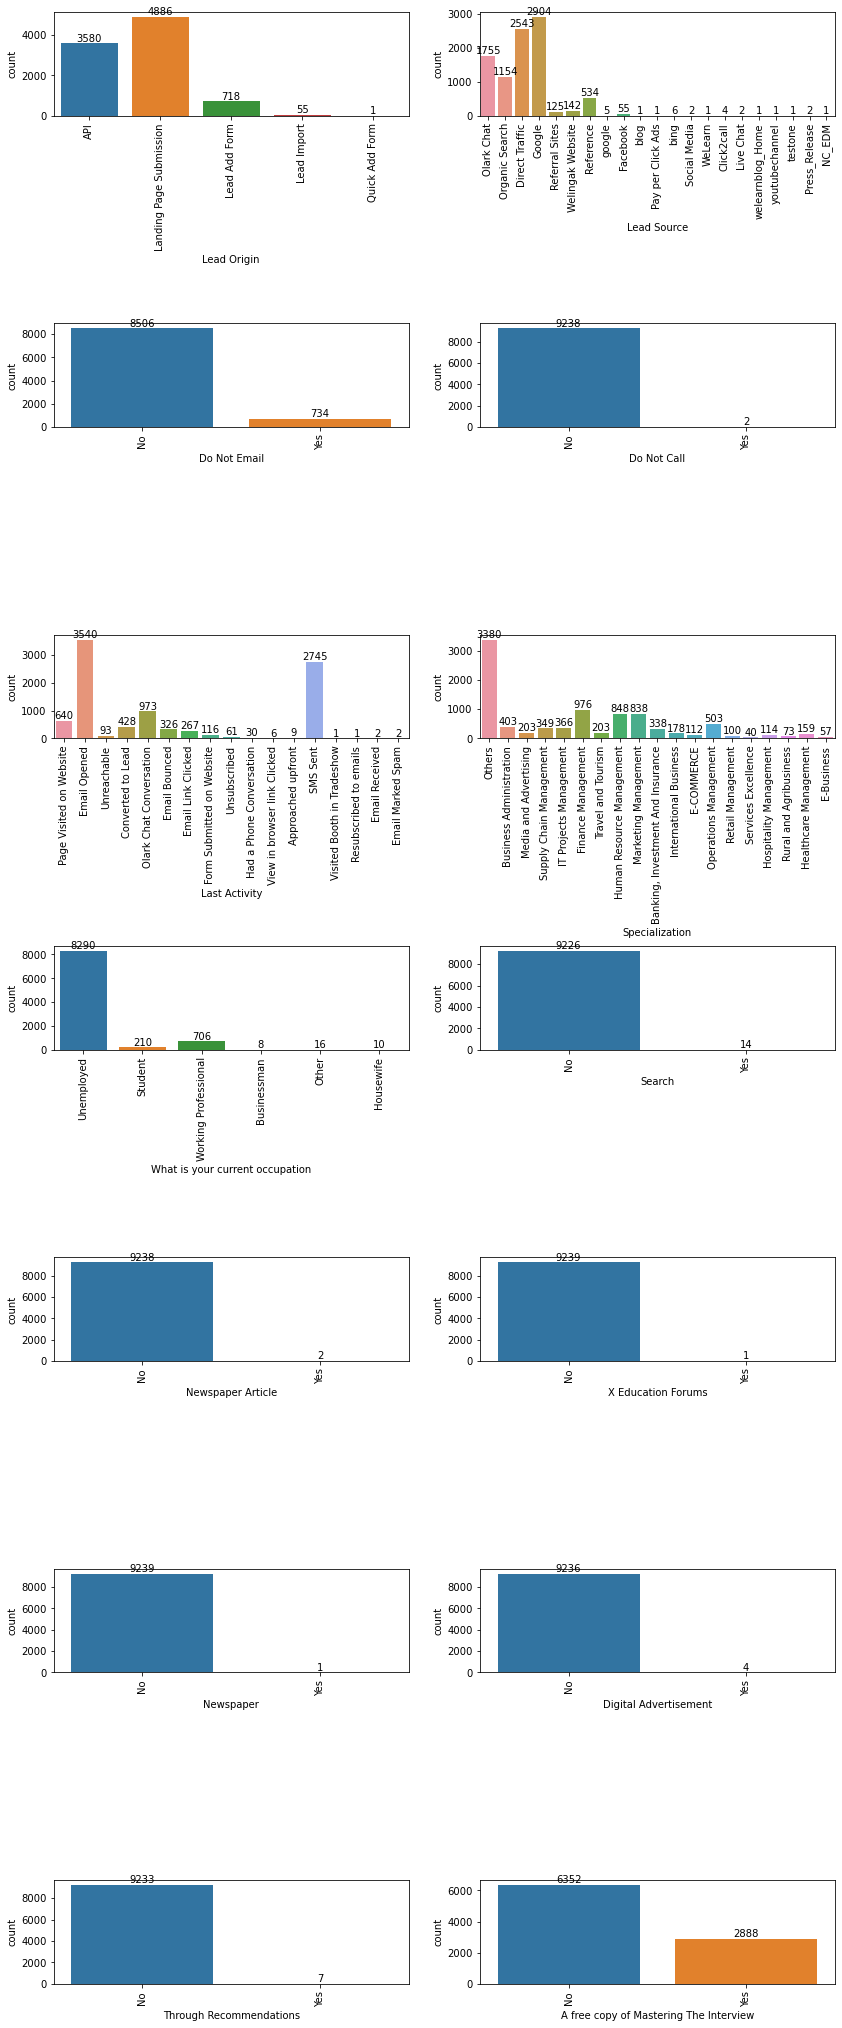

In [199]:
# checking skewness in the category cols
# plotting countplot for object dtype and histogram for number to get data distribution
categ_col = leadscore_df.select_dtypes(include=['category', 'object']).columns.tolist()
plt.figure(figsize=(14,42))

plt.subplots_adjust(wspace=.2,hspace=2)
for i in enumerate(categ_col):
    plt.subplot(8,2, i[0]+1)
    ax=sns.countplot(x=i[1],data=leadscore_df) 
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


plt.show()

In [200]:
# Dropping categorical columns with highly skewed data

print("Before Drop cols : ",leadscore_df.shape)
leadscore_df.drop(['Do Not Call','Search','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],axis=1,inplace=True)
print("After Drop cols: ",leadscore_df.shape)

Before Drop cols :  (9240, 18)
After Drop cols:  (9240, 11)


In [201]:
leadscore_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


#### Outlier Treatment

##### For Numerical Cols

In [202]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[20,10])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

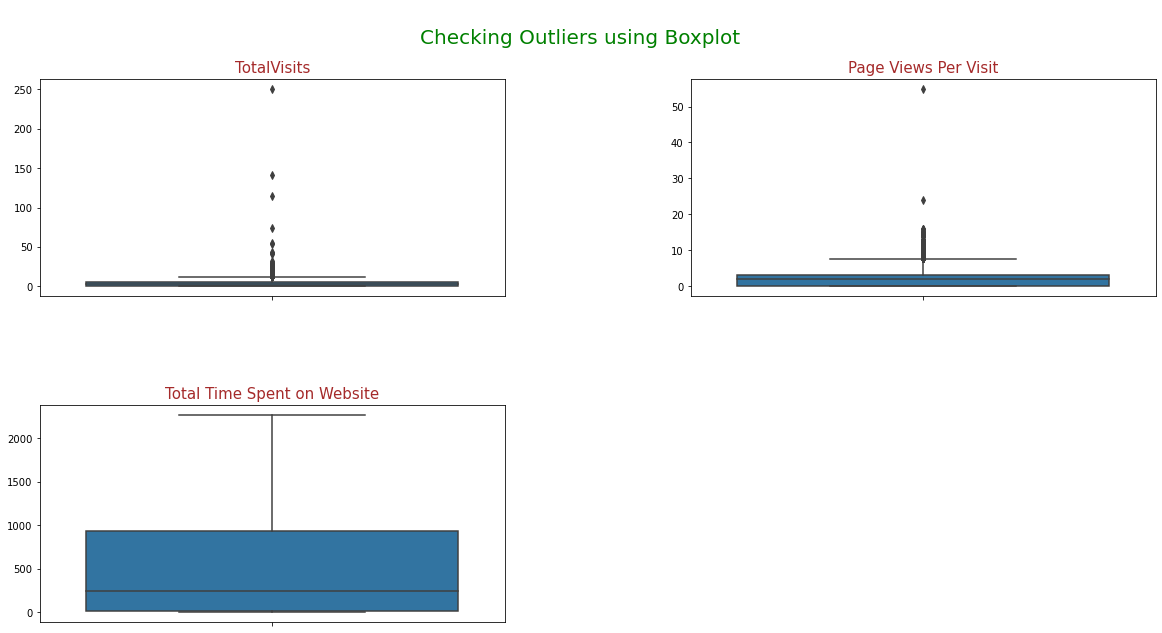

In [203]:
# Checking outliers for numerical variables other than target variable 
num_cols = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF 
Check_Outliers(leadscore_df,num_cols)

In [204]:
# Capping Outliers
# before the Treatment
leadscore_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.394156,487.698268,2.327787
std,0.486714,4.836682,548.021466,2.164258
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,251.000000,2272.000000,55.000000


In [205]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])
        

In [206]:
# Checking outliers for num variables other than target variable 
cap_cols = ["TotalVisits","Page Views Per Visit"]

# UDF 
Outlier_treatment(leadscore_df,cap_cols)

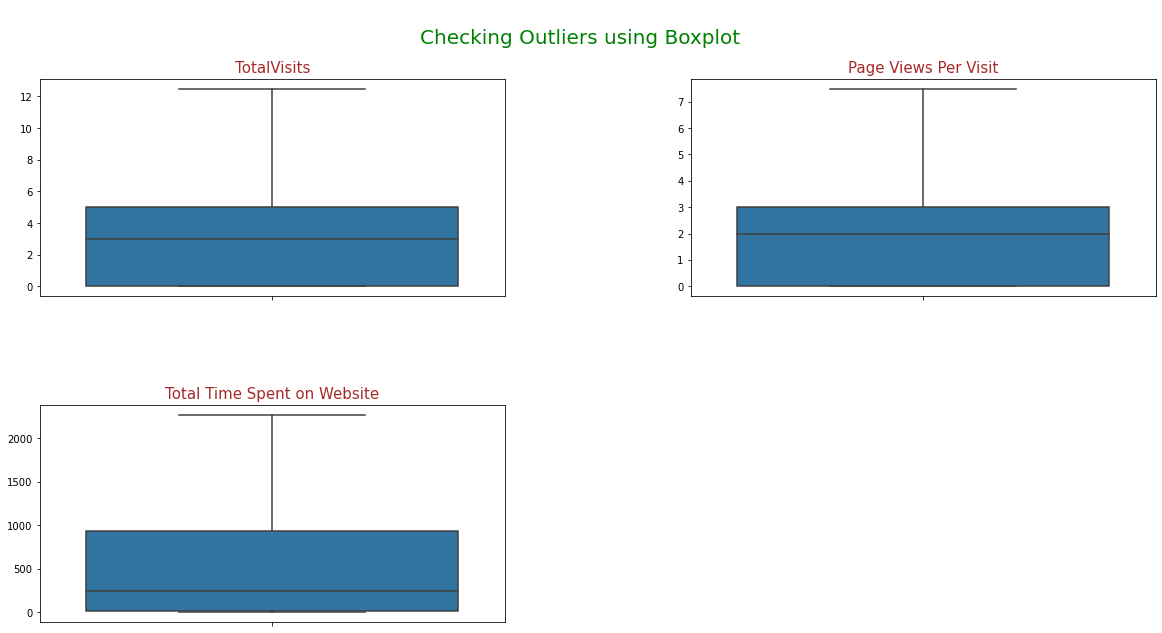

In [207]:
# Plotting Boxplot after Outlier Treatment

numcol_list = ["TotalVisits","Page Views Per Visit","Total Time Spent on Website"]

# UDF for boxplot
Check_Outliers(leadscore_df,numcol_list)

In [208]:
# after outlier treatment
leadscore_df.describe(percentiles=[.10,.25,.50,.75,.95])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.213853,487.698268,2.274987
std,0.486714,3.005136,548.021466,1.917776
min,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.000000,0.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
95%,1.000000,10.000000,1562.000000,6.000000
max,1.000000,12.500000,2272.000000,7.500000


### Fixing Values, Grouping  and Standardising Data

In [209]:
leadscore_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,No


In [210]:
## Categorical Variables 

catvar_col = ["Lead Origin","Lead Source","Do Not Email","Last Activity","Specialization",
                  "What is your current occupation","A free copy of Mastering The Interview"]

for i in catvar_col:
        perc=100*leadscore_df[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("_^_"*40,"\n")


value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

_^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^__^_ 

value_counts % for : Lead Source 

Google               31.428571
Direct Traffic       27.521645
Olark Chat           18.993506
Organic Search       12.489177
Reference             5.779221
Welingak Website      1.536797
Referral Sites        1.352814
Facebook              0.595238
bing                  0.064935
google                0.054113
Click2call            0.043290
Press_Release         0.021645
Social Media          0.021645
Live Chat             0.021645
youtubechannel        0.010823
testone               0.010823
Pay per Click Ads     0.010823
welearnblog_Home      0.010823
WeLearn               0.0108

In [211]:
# Grouping values in Lead score to Others
leadscore_df['Lead Source'] = leadscore_df['Lead Source'].replace(["bing","Click2call","Press_Release",
                                                           "Social Media","Live Chat","youtubechannel",
                                                           "testone","Pay per Click Ads","welearnblog_Home",
                                                           "WeLearn","blog","NC_EDM"],"Others")


In [212]:
# Grouping values in Last activity to Others 
leadscore_df['Last Activity'] = leadscore_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                               'Had a Phone Conversation', 
                                                               'Approached upfront',
                                                               'View in browser link Clicked',       
                                                               'Email Marked Spam',                  
                                                               'Email Received','Visited Booth in Tradeshow',
                                                               'Resubscribed to emails'],'Others')

In [213]:
# Changing google to Google
leadscore_df['Lead Source'] = leadscore_df['Lead Source'].replace("google","Google")

In [214]:
# value_counts after change
leadscore_df["Lead Source"].value_counts(normalize=True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

In [215]:
# value_counts after change
leadscore_df['Last Activity'].value_counts(normalize=True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

In [216]:
# Rename column  to "free_copy_interview" from "A free copy of Mastering The Interview"
leadscore_df.rename(columns={'A free copy of Mastering The Interview': 'free_copy_interview'}, inplace=True)


In [217]:
# Rename column name to "current_job" from "What is your current occupation"
leadscore_df.rename(columns={'What is your current occupation': 'current_job'}, inplace=True)


In [218]:
## Mapping binary categorical variables
leadscore_df['Do Not Email'] = leadscore_df['Do Not Email'].apply(lambda x: 1 if x =='Yes' else 0)

leadscore_df['free_copy_interview'] = leadscore_df['free_copy_interview'].apply(lambda x: 1 if x =='Yes' else 0)

In [219]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9240 non-null   object 
 1   Lead Source                  9240 non-null   object 
 2   Do Not Email                 9240 non-null   int64  
 3   Converted                    9240 non-null   int64  
 4   TotalVisits                  9240 non-null   float64
 5   Total Time Spent on Website  9240 non-null   int64  
 6   Page Views Per Visit         9240 non-null   float64
 7   Last Activity                9240 non-null   object 
 8   Specialization               9240 non-null   object 
 9   current_job                  9240 non-null   object 
 10  free_copy_interview          9240 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 794.2+ KB


### Exploratory Data Analysis

##### Checking for data imbalance by plotiing graphs

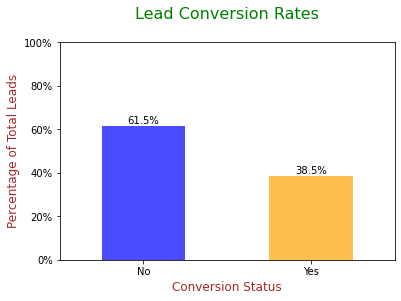

In [220]:
# Creating a bar plot to visualize the distribution of converted leads
ax = (100 * leadscore_df["Converted"].value_counts(normalize=True)).plot.bar(color=["blue", "orange"], alpha=0.7)

# Setting and formatting the title
plt.title("Lead Conversion Rates\n", fontdict={'fontsize': 16, 'fontweight': 12, 'color': 'green'})

# Labeling the x and y axes
plt.xlabel('Conversion Status', fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'brown'})
plt.ylabel("Percentage of Total Leads", fontdict={'fontsize': 12, 'fontweight': 20, 'color': 'brown'})

# Adjusting the y-axis ticks
ticks = np.arange(0, 101, 20)
labels = ["{:.0f}%".format(i) for i in ticks]
plt.yticks(ticks, labels)

# Customizing the x-axis labels
plt.xticks([0, 1], ["No", "Yes"])
plt.xticks(rotation=0)

# Adding percentage labels above the bars
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()


#### conversion rate of leads is 38.5%

In [221]:
### Ratio of Data Imbalance
ratio=(leadscore_df["Converted"].value_counts(normalize=True).loc[0])/(leadscore_df["Converted"].value_counts(normalize=True).loc[1])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


### Univariate Analysis




In [222]:
leadscore_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,current_job,free_copy_interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [223]:
##List of categorical columns
catcol_list = ["Lead Origin","current_job","Do Not Email",
            "free_copy_interview","Lead Source","Last Activity","Specialization"]

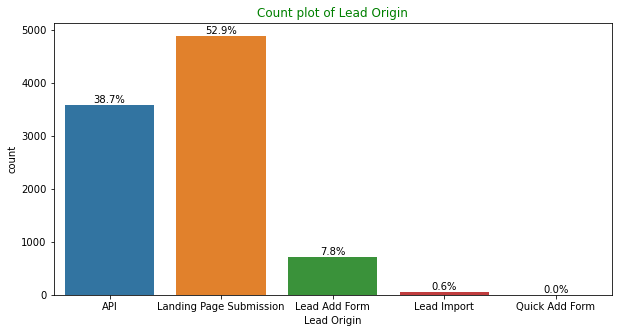

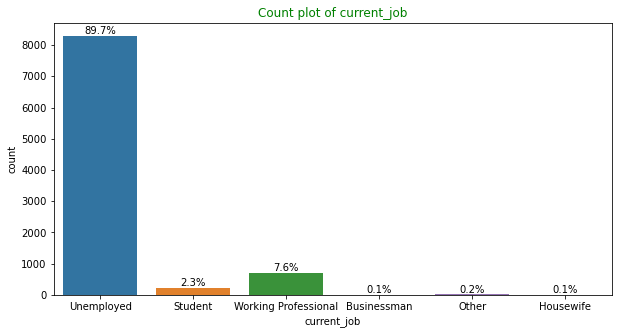

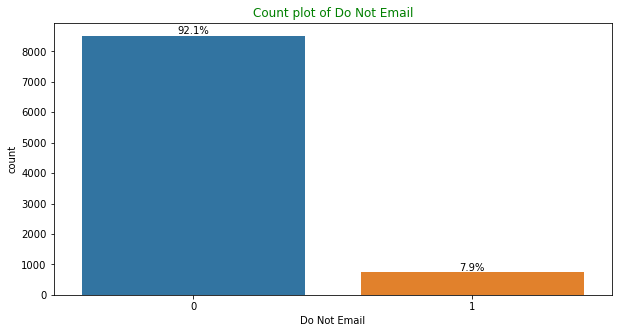

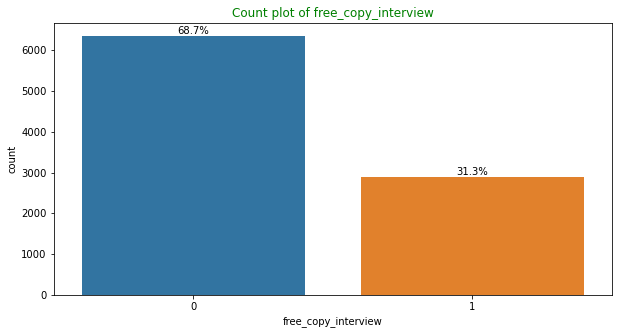

In [224]:
# countplot of columns with its value_counts percentage as annotation
for i in catcol_list[:4]:
    
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(i), color="green")
    ax = sns.countplot(x=i, data=leadscore_df)
    total = len(leadscore_df[i])
    plt.xticks(rotation=0)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


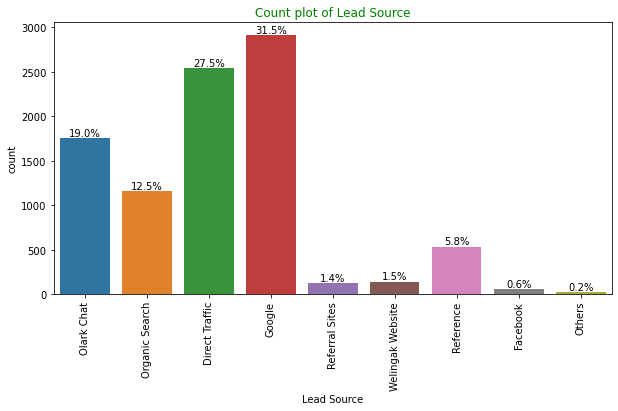

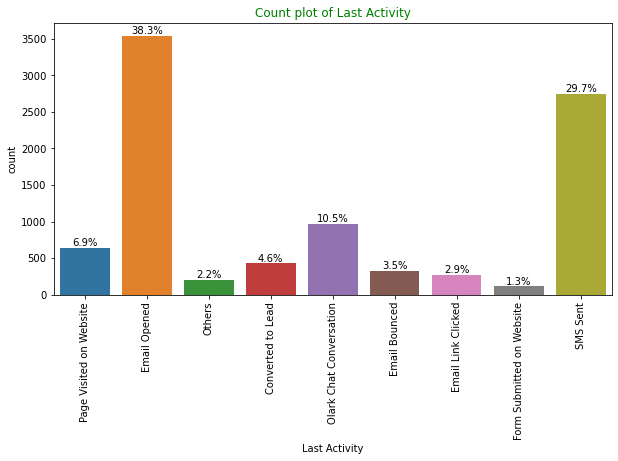

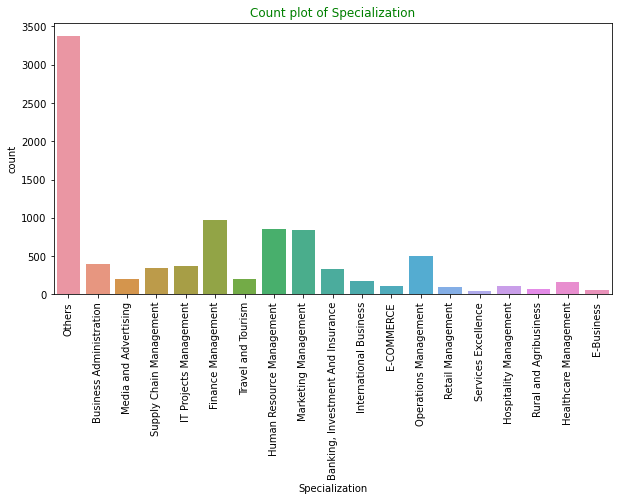

In [225]:
for i in catcol_list[4:]:
    
    plt.figure(figsize=[10, 5])
    plt.title("Count plot of {}".format(i), color="green")
    ax = sns.countplot(x=i, data=leadscore_df)  # Default colors
    total = len(leadscore_df[i])
    plt.xticks(rotation=90)
    
    if i != "Specialization": 
        for p in ax.patches:
            text = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2.
            y = p.get_height()

            ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    else:
        pass

### Insights:

##### Current Occupation: The largest group, comprising 90% of customers, is classified as "Unemployed" in terms of their current occupation.

##### Do Not Email: A significant 92% of individuals have expressed their preference not to receive emails about the course.

##### Lead Source: The majority of leads, accounting for 58%, are generated from a combination of "Google" and "Direct Traffic" sources.

##### Last Activity: Approximately 68% of customers have engaged in activities such as "SMS Sent" and "Email Opened," indicating their active participation in these activities.

##### Lead Origin: Among the lead origins, "Landing Page Submission" stands out as the source for 53% of customers, followed by "API," which is responsible for identifying 39% of them.






## Bivariate Analysis

In [226]:
def Bivariate_cat(df, variable_name, Target="Converted"):
    plt.figure(figsize=(20, 6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name), color="Brown", fontsize=18)

    # 1st plot in subplot
    plt.subplot(1, 2, 1)
    plt.title("Distribution of {}".format(variable_name), color="blue")
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="BuPu", alpha=0.46)

    total = len(df[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No", "Yes"], title="Converted")

    # Annotation for 1st plot
    for p in ax.patches:
        text = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

    # 2nd plot
    plt.subplot(1, 2, 2)
    plt.title("Lead Conversion Rate of {}".format(variable_name), color="green", fontsize=12)
    ax = sns.countplot(x=variable_name, hue=Target, data=df, palette="BrBG", alpha=0.85)  # ax1 is for annotation

    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count", color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted", "Converted"], title="Lead Conversion Rate")

    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total):.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


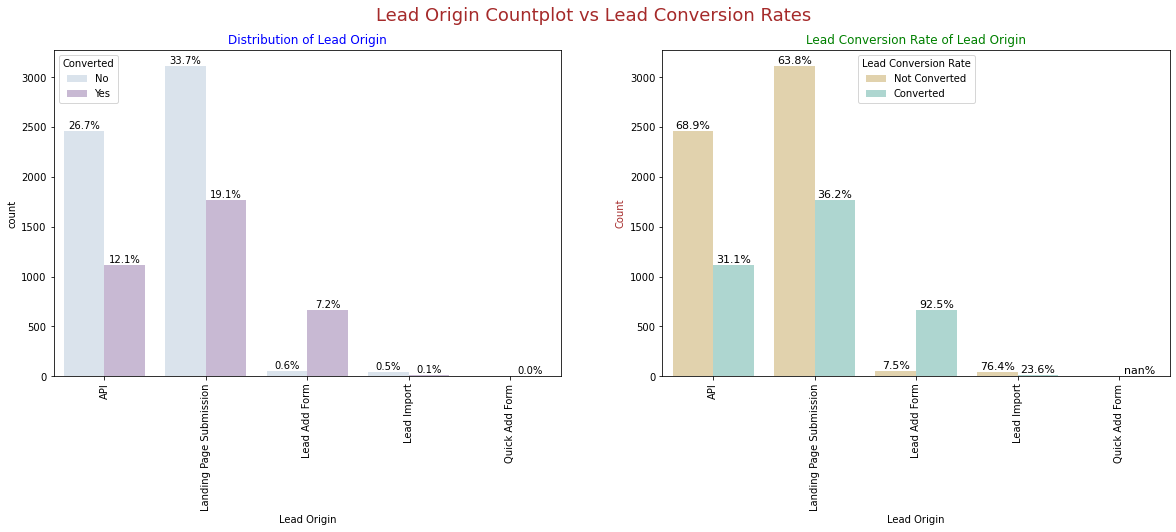

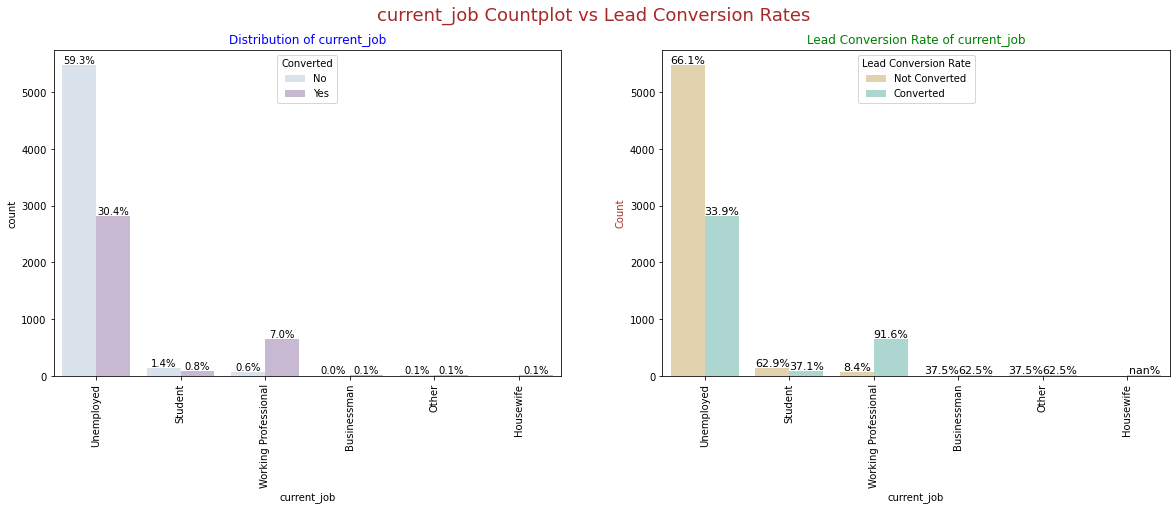

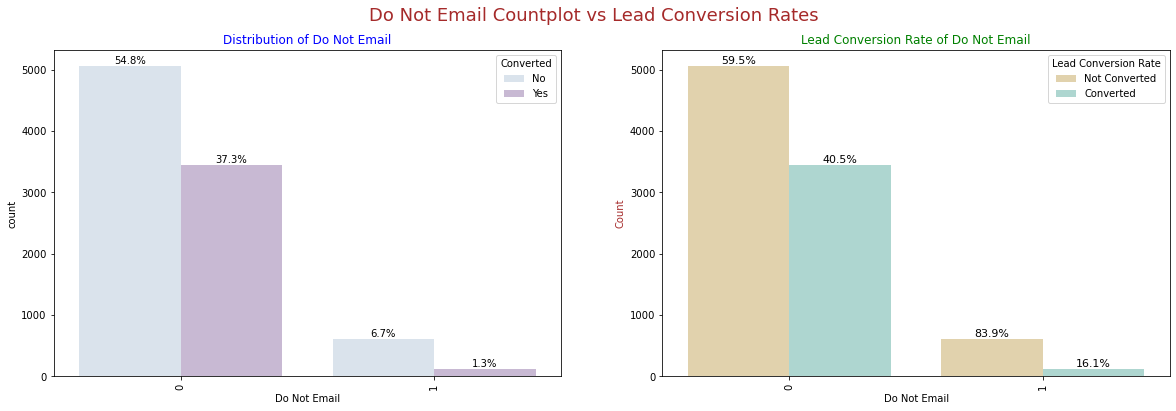

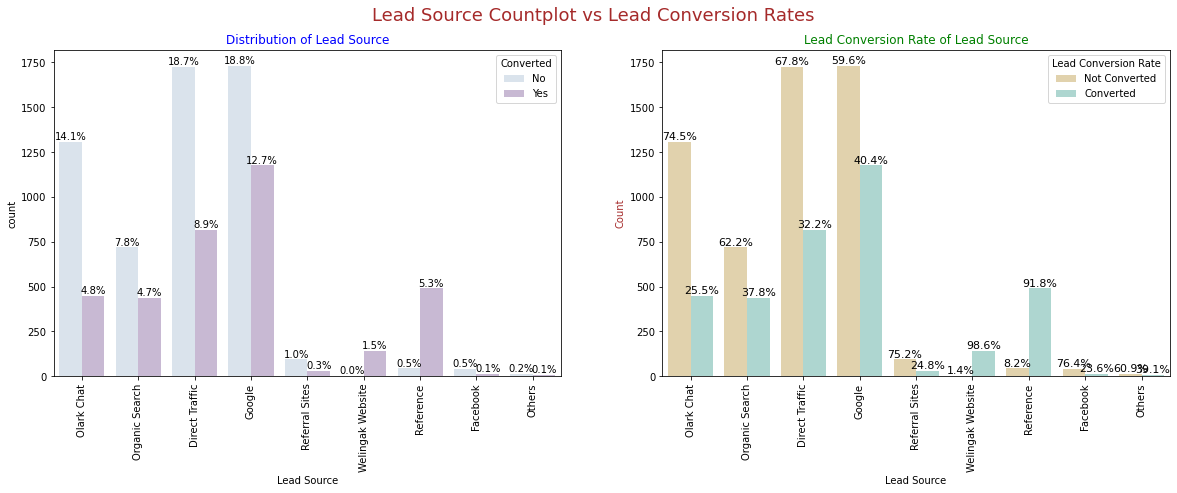

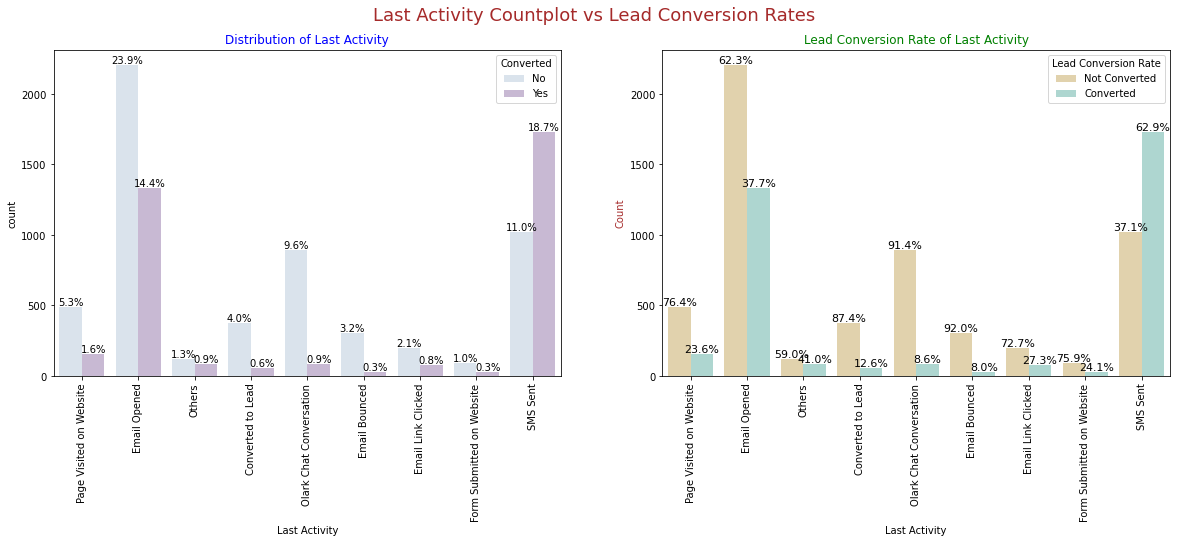

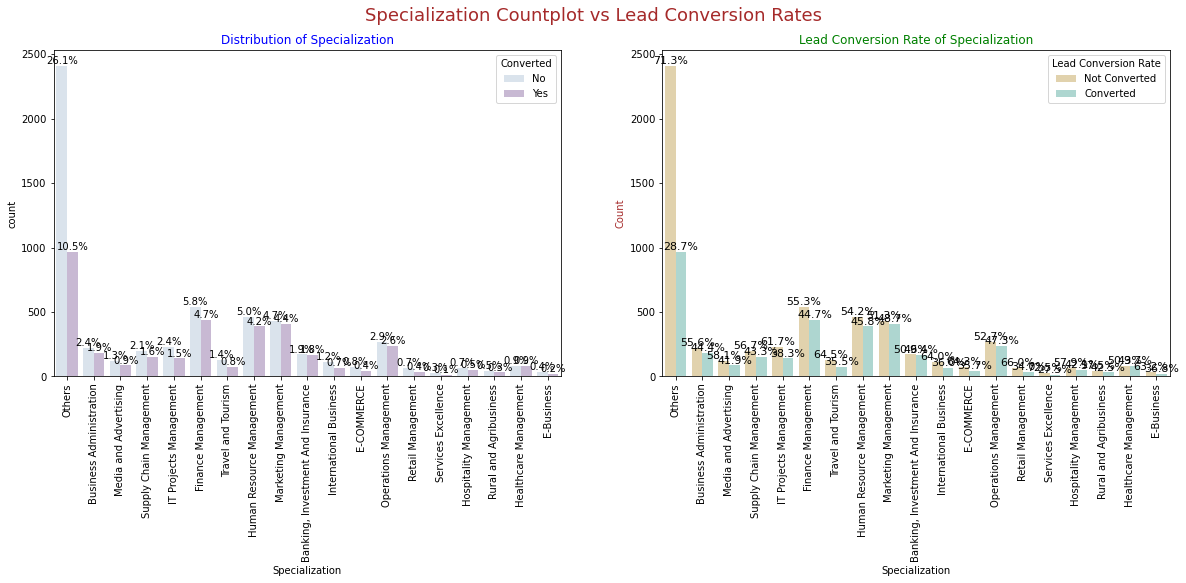

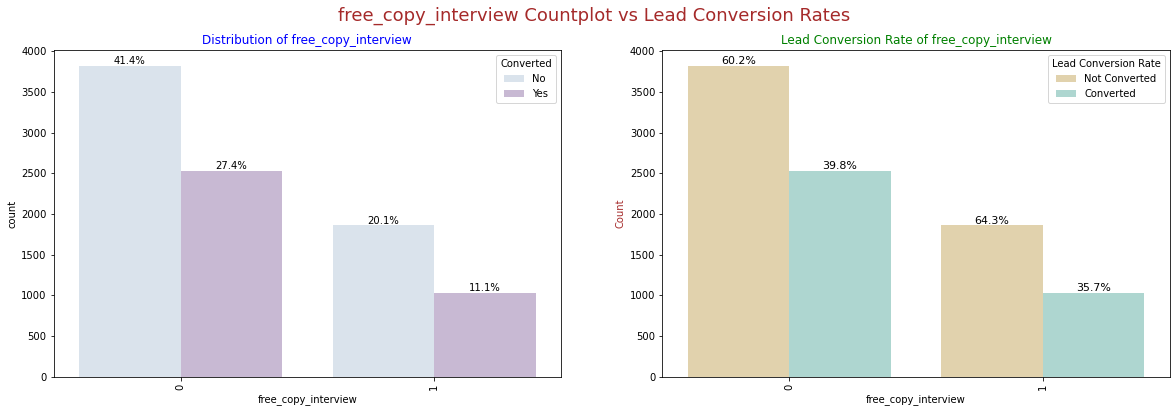

In [227]:
catecol_list = ["Lead Origin","current_job","Do Not Email",
            "Lead Source","Last Activity","Specialization","free_copy_interview"]

for i in catecol_list:
    Bivariate_cat(leadscore_df,variable_name=i)

## Insights:

#### Do Not Email: An overwhelming 92% of people have opted not to receive emails about the course, indicating a strong preference against email communication.

#### Lead Source: Google leads the pack with a 40% lead conversion rate (LCR), even though it accounts for only 31% of the total customers. Direct Traffic follows with a 32% LCR, but its customer contribution is slightly lower at 27% compared to Google. Organic Search demonstrates a strong LCR of 37.8%, but it comes from only 12.5% of the customers. On the other hand, Reference boasts an impressive 91% LCR, though it represents a smaller group, making up just 6% of customers.

#### Last Activity: The "SMS Sent" activity stands out with the highest LCR at 63%, although it represents only 30% of the last activities performed by customers. "Email Opened" activity accounts for 38% of last activities and exhibits a respectable LCR of 37%.

#### Lead Origin: "Landing Page Submission" emerges as the most common lead origin, encompassing around 52% of all leads. It achieves a solid LCR of 36%. Meanwhile, "API" identifies approximately 39% of customers, with a decent LCR of 31%.

#### Current Occupation: While the majority, approximately 90%, of customers are unemployed, they still contribute to a respectable lead conversion rate (LCR) of 34%. In contrast, Working Professionals make up only 7.6% of total customers but have an impressive LCR of nearly 92%, indicating a high likelihood of conversion among this group.

#### Specialization: Specializations like Marketing Management, HR Management, and Finance Management are noteworthy due to their significant contributions to the leads.



### Bivariate for numerical variables

<Figure size 1152x288 with 0 Axes>

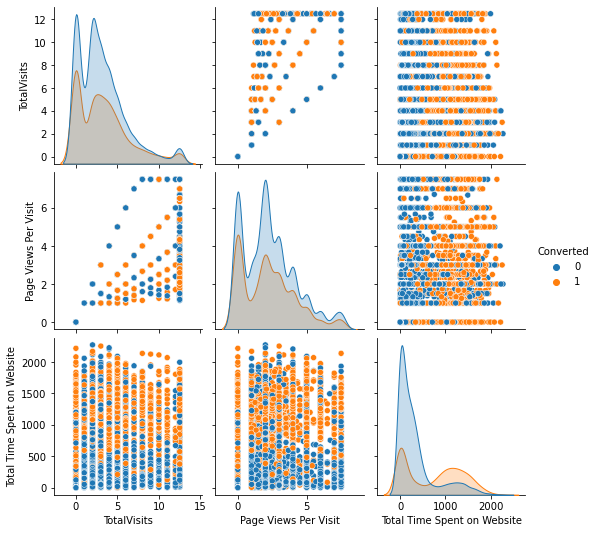

In [228]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=leadscore_df,vars=numcol_list,hue="Converted")                                  
plt.show()

In [229]:
numcol_list =["Converted",'TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']

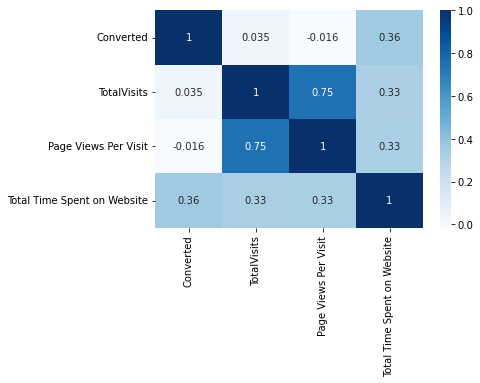

In [230]:
#correlation Heatmap
sns.heatmap(data=leadscore_df[numcol_list].corr(),cmap="Blues",annot=True)
plt.show()

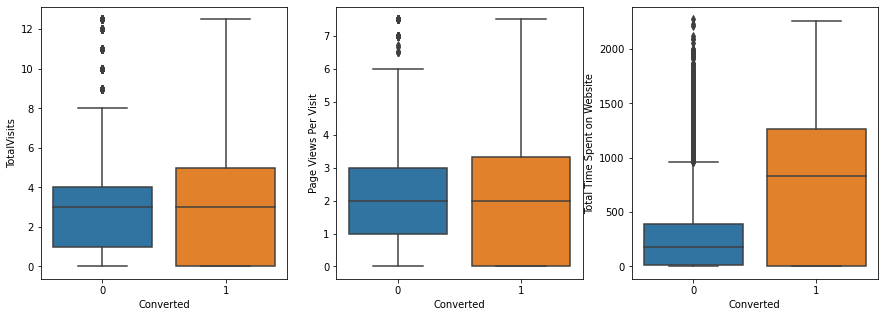

In [231]:
# Boxplot

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leadscore_df)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leadscore_df)
plt.subplot(1,3,3)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leadscore_df)
plt.show()

##### The boxplot analysis reveals that past leads who spend more time on the website tend to have a higher conversion rate compared to those who spend less time.

### Preparing the Data

In [232]:
leadscore_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,current_job,free_copy_interview
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0


In [233]:

# Creating a dummy variable for some of the categorical variables dropping first
dum = pd.get_dummies(leadscore_df[["Lead Origin","Lead Source","Last Activity","Specialization","current_job"]], drop_first=True)

# Adding the results to dataframe
leadscore_df = pd.concat([leadscore_df, dum], axis=1)

In [234]:
#Reviewing the modofication
leadscore_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,current_job,free_copy_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,current_job_Housewife,current_job_Other,current_job_Student,current_job_Unemployed,current_job_Working Professional
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [235]:
#Dropping variables for which dummies are created
leadscore_df = leadscore_df.drop(["Lead Origin","Lead Source","Last Activity","Specialization","current_job"],1)

In [236]:
leadscore_df.shape

(9240, 49)

In [237]:
leadscore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 49 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   free_copy_interview                       9240 non-null   int64  
 6   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 7   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 8   Lead Origin_Lead Import                   9240 non-null   uint8  
 9   Lead Origin_Quick Add Form                9240 non-null   uint8  
 10  Lead Source_Facebook                

## Test-Train Split

In [238]:
# Assigning predictor variables to X
X = leadscore_df.drop('Converted', axis=1)

# Assigning Target variables to y
y = leadscore_df["Converted"]


In [239]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [240]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 48) 
y_train: (6468,)


In [241]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 48) 
y_test: (2772,)


In [242]:
# Employing the StandardScaler to standardize the feature values
scaler = StandardScaler()
# Selecting columns with data types 'int64' and 'float64' from the training dataset for scaling
numcol_list = X_train.select_dtypes(include=['int64', 'float64']).columns

# Applying the scaling transformation to the selected numeric columns in the training dataset
X_train[numcol_list] = scaler.fit_transform(X_train[numcol_list])


In [243]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,free_copy_interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,current_job_Housewife,current_job_Other,current_job_Student,current_job_Unemployed,current_job_Working Professional
1871,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
6795,-0.291638,0.262370,0.005716,-0.488713,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3516,-0.291638,0.594206,-0.691418,0.123715,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8105,-0.291638,0.594206,1.365219,1.432322,-0.673169,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3934,-0.291638,-1.064974,-0.885371,-1.184892,-0.673169,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [244]:
conversion_rate = (sum(leadscore_df['Converted']) / len(leadscore_df['Converted'].index)) * 100
conversion_rate

38.53896103896104

### Correlations

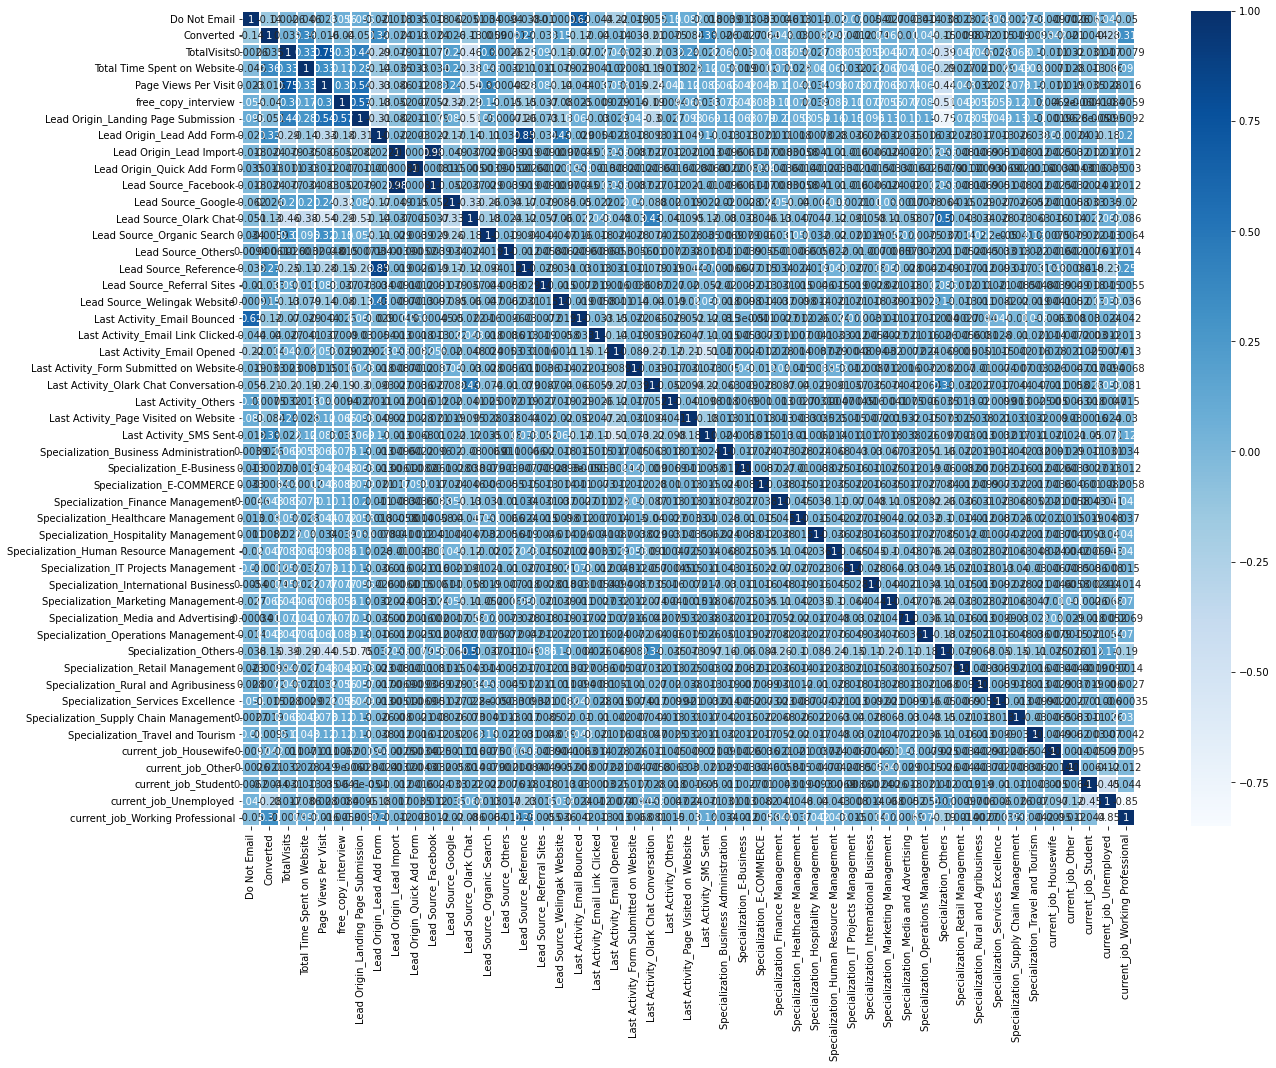

In [245]:
# analyse correlation matrix
plt.figure(figsize = (20,15))        
sns.heatmap(leadscore_df.corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

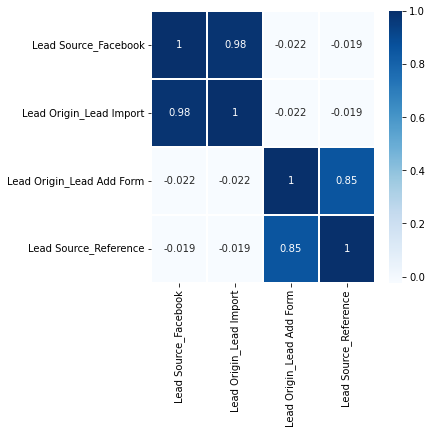

In [246]:
plt.figure(figsize = (5,5))        
sns.heatmap(leadscore_df[["Lead Source_Facebook","Lead Origin_Lead Import","Lead Origin_Lead Add Form","Lead Source_Reference"]].corr(),linewidths=0.01,cmap="Blues",annot=True)
plt.show()

In [247]:
## due to the high correlation we can drop 2 of the variables 
X_test = X_test.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Lead Import','Lead Origin_Lead Add Form'],1)

### Building the Logistic Regression Model for Predicting a Categorical Variable:

##### Initial Feature Selection Using Recursive Feature Elimination (RFE) (Coarse Tuning).
##### Further Refinement Through Manual Fine-Tuning Using p-Values and Variance Inflation Factors (VIFs).

In [248]:
# Lets use RFE to reduce variables 
log_reg = LogisticRegression()
rfe = RFE(log_reg, n_features_to_select=15)            
rfe = rfe.fit(X_train, y_train)

In [249]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('TotalVisits', False, 9),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('free_copy_interview', False, 18),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Others', True, 1),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 24),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 14),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 12),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration

In [250]:
# Display the top 15 features selected by RFE (Recursive Feature Elimination)
top_15_features = pd.DataFrame({
    'Features': X_train.columns,
    'Selected by RFE': rfe.support_,
    'Ranking': rfe.ranking_
})
top_15_features = top_15_features.sort_values(by='Ranking')
top_15_features

,Features,Selected by RFE,Ranking
22,Last Activity_SMS Sent,True,1
41,current_job_Housewife,True,1
35,Specialization_Others,True,1
28,Specialization_Hospitality Management,True,1
20,Last Activity_Others,True,1
19,Last Activity_Olark Chat Conversation,True,1
17,Last Activity_Email Opened,True,1
14,Lead Source_Welingak Website,True,1
12,Lead Source_Reference,True,1
11,Lead Source_Others,True,1


In [251]:
# columns which are selected by RFE
cols_rfe = X_train.columns[rfe.support_]
cols_rfe

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Source_Facebook', 'Lead Source_Olark Chat', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Others',
       'current_job_Housewife', 'current_job_Working Professional'],
      dtype='object')

In [252]:
# columns which are not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'free_copy_interview', 'Lead Origin_Quick Add Form',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Ex

In [253]:
def vif_ret(ref_df):
    X = pd.DataFrame()
    X['Features'] = ref_df.columns
    X['VIF'] = [variance_inflation_factor(ref_df.values, i) for i in range(ref_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### First Model

In [254]:
# Constructing a statistical model using statsmodels for detailed statistical analysis

# Selecting columns chosen by Recursive Feature Elimination (RFE) for this model
cols_rfe = X_train.columns[rfe.support_]

# Creating the X_train dataframe with variables selected by RFE
X_train_rfe = X_train[cols_rfe]

# Adding a constant variable to the feature set
X_train_with_const = sm.add_constant(X_train_rfe)

# Fitting a logistic regression model
logistic_model = sm.GLM(y_train, X_train_with_const, family=sm.families.Binomial()).fit()

# Extracting the model parameters
model_1=logistic_model
model_1_parameters = logistic_model.params

model_1_parameters

const                                    -1.033284
Total Time Spent on Website               1.050544
Lead Origin_Landing Page Submission      -1.272090
Lead Source_Facebook                     -0.696059
Lead Source_Olark Chat                    0.900083
Lead Source_Others                        0.980708
Lead Source_Reference                     2.897685
Lead Source_Welingak Website              5.380227
Last Activity_Email Opened                0.950623
Last Activity_Olark Chat Conversation    -0.553411
Last Activity_Others                      1.258012
Last Activity_SMS Sent                    2.068763
Specialization_Hospitality Management    -1.072037
Specialization_Others                    -1.193681
current_job_Housewife                    23.022209
current_job_Working Professional          2.685466
dtype: float64

In [255]:
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2732.8
Date:                Tue, 24 Oct 2023   Deviance:                       5465.5
Time:                        22:18:59   Pearson chi2:                 8.09e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [256]:
####Important Note: The column "Current_occupation_Housewife" will be excluded from the model because it
##exhibits a high p-value of 0.999, surpassing the conventional threshold of 0.05 for statistical significance.


### Model 2

In [257]:
cols_rfe =cols_rfe.drop("current_job_Housewife")

In [258]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[cols_rfe]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  
model_2=logm2
model_2.params

const                                   -1.025075
Total Time Spent on Website              1.049364
Lead Origin_Landing Page Submission     -1.267369
Lead Source_Facebook                    -0.696913
Lead Source_Olark Chat                   0.899051
Lead Source_Others                       0.973897
Lead Source_Reference                    2.917123
Lead Source_Welingak Website             5.379144
Last Activity_Email Opened               0.949036
Last Activity_Olark Chat Conversation   -0.558345
Last Activity_Others                     1.248172
Last Activity_SMS Sent                   2.058828
Specialization_Hospitality Management   -1.079528
Specialization_Others                   -1.197801
current_job_Working Professional         2.677350
dtype: float64

In [259]:
print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.3
Date:                Tue, 24 Oct 2023   Deviance:                       5480.7
Time:                        22:18:59   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [260]:
#Model 3
# Dropping 'Lead Source_Facebook' column
cols_rfe=cols_rfe.drop("Lead Source_Facebook")

In [261]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[cols_rfe]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

model_3=logm3
model_3.params

const                                   -1.040542
Total Time Spent on Website              1.051824
Lead Origin_Landing Page Submission     -1.249311
Lead Source_Olark Chat                   0.916940
Lead Source_Others                       0.981395
Lead Source_Reference                    2.937179
Lead Source_Welingak Website             5.396676
Last Activity_Email Opened               0.943420
Last Activity_Olark Chat Conversation   -0.558250
Last Activity_Others                     1.248700
Last Activity_SMS Sent                   2.055550
Specialization_Hospitality Management   -1.090368
Specialization_Others                   -1.194330
current_job_Working Professional         2.675678
dtype: float64

In [262]:
print(model_3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Tue, 24 Oct 2023   Deviance:                       5482.6
Time:                        22:19:00   Pearson chi2:                 8.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [263]:
#Model 4
#Dropping others column
cols_rfe=cols_rfe.drop("Lead Source_Others")


In [264]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[cols_rfe]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

model_4=logm4
model_4.params

const                                   -1.023594
Total Time Spent on Website              1.049789
Lead Origin_Landing Page Submission     -1.258954
Lead Source_Olark Chat                   0.907184
Lead Source_Reference                    2.925326
Lead Source_Welingak Website             5.388662
Last Activity_Email Opened               0.942099
Last Activity_Olark Chat Conversation   -0.555605
Last Activity_Others                     1.253061
Last Activity_SMS Sent                   2.051879
Specialization_Hospitality Management   -1.094445
Specialization_Others                   -1.203333
current_job_Working Professional         2.669665
dtype: float64

In [265]:
print(model_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2743.1
Date:                Tue, 24 Oct 2023   Deviance:                       5486.1
Time:                        22:19:00   Pearson chi2:                 8.11e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [266]:

# Checking VIFs for all variables in the Model 4 
vif_ret(X_train_rfe)

,Features,VIF
0,Specialization_Others,2.47
1,Lead Origin_Landing Page Submission,2.45
2,Last Activity_Email Opened,2.36
3,Last Activity_SMS Sent,2.20
4,Lead Source_Olark Chat,2.14
5,Last Activity_Olark Chat Conversation,1.72
6,Lead Source_Reference,1.31
7,Total Time Spent on Website,1.24
8,current_job_Working Professional,1.21
9,Lead Source_Welingak Website,1.08


## Model Evaluation

In [267]:
#predicted values train set
y_train_p = model_4.predict(X_train_sm4)         

y_train_p[:10]

1871    0.474082
6795    0.073252
3516    0.249087
8105    0.768973
3934    0.212973
4844    0.987807
3297    0.108454
8071    0.996128
987     0.169259
7423    0.869641
dtype: float64

In [268]:
# for array
y_train_p = y_train_p.values.reshape(-1)
y_train_p[:10]

array([0.47408215, 0.07325161, 0.24908697, 0.7689732 , 0.2129729 ,
       0.9878074 , 0.1084541 , 0.99612765, 0.16925902, 0.86964073])

In [269]:
# Creating a dataframe 

y_train_prediction = pd.DataFrame({'Converted':y_train.values, 'con_probabilities':y_train_p})
y_train_prediction['Prospect ID'] = y_train.index
y_train_prediction.head()


,Converted,con_probabilities,Prospect ID
0,0,0.474082,1871
1,0,0.073252,6795
2,0,0.249087,3516
3,0,0.768973,8105
4,0,0.212973,3934


In [270]:
y_train_prediction['Predicted'] = y_train_prediction["con_probabilities"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_prediction.head()

,Converted,con_probabilities,Prospect ID,Predicted
0,0,0.474082,1871,0
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


In [271]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_prediction["Converted"], y_train_prediction["Predicted"])
print(confusion)

[[3588  414]
 [ 846 1620]]


In [272]:
#accuracy.
print(metrics.accuracy_score(y_train_prediction["Converted"], y_train_prediction["Predicted"]))

0.8051948051948052


In [273]:
## Plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [274]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_prediction["Converted"], y_train_prediction["con_probabilities"], drop_intermediate = False )

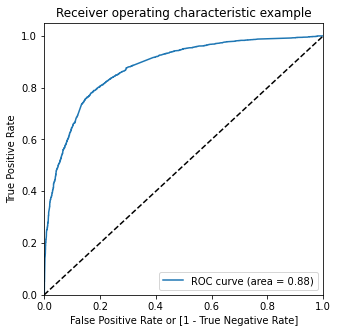

In [275]:
# ROC curve for Train Set
draw_roc(y_train_prediction["Converted"], y_train_prediction["con_probabilities"])

In [276]:
#optimal cutoff point/probability
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_prediction[i]= y_train_prediction['con_probabilities'].map(lambda x: 1 if x > i else 0)
y_train_prediction.head()

,Converted,con_probabilities,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.474082,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.073252,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.249087,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.768973,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.212973,3934,0,1,1,1,0,0,0,0,0,0,0


In [277]:
df_coff = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_prediction["Converted"], y_train_prediction[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    df_coff.loc[i] =[ i ,accuracy,sensi,speci]
print(df_coff)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.595702  0.973642  0.362819
0.2   0.2  0.721243  0.920114  0.598701
0.3   0.3  0.791280  0.832928  0.765617
0.4   0.4  0.813698  0.763585  0.844578
0.5   0.5  0.805195  0.656934  0.896552
0.6   0.6  0.792981  0.585969  0.920540
0.7   0.7  0.779066  0.507705  0.946277
0.8   0.8  0.754020  0.405515  0.968766
0.9   0.9  0.707792  0.247364  0.991504


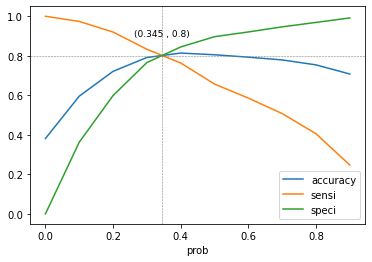

In [278]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

# Rename variables
sens_interp = interp1d(df_coff['prob'], df_coff['sensi'], kind='linear')
acc_interp = interp1d(df_coff['prob'], df_coff['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sens_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
spec_interp = interp1d(df_coff['prob'], df_coff['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : spec_interp(x) - acc_interp(x), 0.5)), 3)

intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
acc_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sens_at_intersection = np.round(float(sens_interp(intersection_x)), 2)
spec_at_intersection = np.round(float(spec_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
df_coff.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey', linewidth=0.55, linestyle='--')
plt.axhline(y=acc_at_intersection, color='grey', linewidth=0.55, linestyle='--')

plt.annotate(f'({intersection_x} , {acc_at_intersection})',
             xy=(intersection_x, acc_at_intersection),
             xytext=(0, 20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

plt.show()


In [279]:
y_train_prediction['final_predicted'] = y_train_prediction['con_probabilities'].map( lambda x: 1 if x > 0.345 else 0)

# deleting the unwanted columns from dataframe
y_train_prediction.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_prediction.head()

,Converted,con_probabilities,Prospect ID,final_predicted
0,0,0.474082,1871,1
1,0,0.073252,6795,0
2,0,0.249087,3516,0
3,0,0.768973,8105,1
4,0,0.212973,3934,0


In [280]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_prediction["Converted"], y_train_prediction["final_predicted"]))


0.8045763760049475


In [281]:
# UDF for all Logistic Regression Metrics
def log_reg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [282]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_prediction['Converted'], y_train_prediction['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
log_reg_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3230  772]
 [ 492 1974]] 

************************************************** 

True Negative                    :  3230
True Positive                    :  1974
False Negative                   :  492
False Positve                    :  772
Model Accuracy                   :  0.8046
Model Sensitivity                :  0.8005
Model Specificity                :  0.8071
Model Precision                  :  0.7189
Model Recall                     :  0.8005
Model True Positive Rate (TPR)   :  0.8005
Model False Positive Rate (FPR)  :  0.1929


************************************************** 



In [283]:
#Creating precision-recall tradeoff curve
y_train_prediction['Converted'], y_train_prediction['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_prediction['Converted'], y_train_prediction['Converted'])

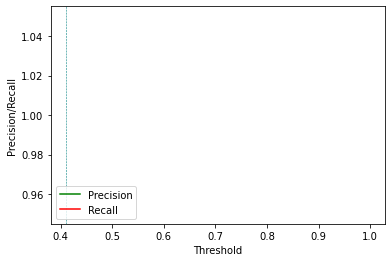

In [284]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.41, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

In [285]:
#copying df to test model
y_train_precision_recall = y_train_prediction.copy()

In [286]:
# assigning a feature for 0.41 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted'].map( lambda x: 1 if x > 0.41 else 0)
y_train_precision_recall.head()

,Converted,con_probabilities,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.474082,1871,1,0
1,0,0.073252,6795,0,0
2,0,0.249087,3516,0,0
3,0,0.768973,8105,1,0
4,0,0.212973,3934,0,0


In [287]:
# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
log_reg_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[4002    0]
 [   0 2466]] 

************************************************** 

True Negative                    :  4002
True Positive                    :  2466
False Negative                   :  0
False Positve                    :  0
Model Accuracy                   :  1.0
Model Sensitivity                :  1.0
Model Specificity                :  1.0
Model Precision                  :  1.0
Model Recall                     :  1.0
Model True Positive Rate (TPR)   :  1.0
Model False Positive Rate (FPR)  :  0.0


************************************************** 



In [288]:
# Lets add Lead Score 

y_train_prediction['Lead_Score'] = y_train_prediction['Converted'].map( lambda x: round(x*100))
y_train_prediction.head()

,Converted,con_probabilities,Prospect ID,final_predicted,Lead_Score
0,0,0.474082,1871,1,0
1,0,0.073252,6795,0,0
2,0,0.249087,3516,0,0
3,0,0.768973,8105,1,0
4,0,0.212973,3934,0,0


#### Scaling Test Dataset

In [289]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 46 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              2772 non-null   int64  
 1   TotalVisits                               2772 non-null   float64
 2   Total Time Spent on Website               2772 non-null   int64  
 3   Page Views Per Visit                      2772 non-null   float64
 4   free_copy_interview                       2772 non-null   int64  
 5   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 6   Lead Origin_Quick Add Form                2772 non-null   uint8  
 7   Lead Source_Facebook                      2772 non-null   uint8  
 8   Lead Source_Google                        2772 non-null   uint8  
 9   Lead Source_Olark Chat                    2772 non-null   uint8  
 10  Lead Source_Organic Search       

In [290]:
numcol_list=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[numcol_list] = scaler.transform(X_test[numcol_list])

X_test = X_test[cols_rfe]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Others,current_job_Working Professional
4269,0.964504,0,0,0,0,0,0,0,1,0,1,0
2376,-0.885371,0,0,1,0,0,0,0,1,0,1,0
7766,-0.777416,0,0,0,0,0,0,1,0,0,0,1
9199,-0.885371,0,1,0,0,0,1,0,0,0,1,0
4359,-0.885371,0,0,1,0,1,0,0,0,0,0,0


#### Prediction on Test Dataset

In [291]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 13)

In [306]:
# making prediction using model 4 (final model)
y_test_predictions = logm4.predict(X_test_sm)

In [308]:
# top 10 columns
y_test_predictions[:10]

4269    0.697934
2376    0.860665
7766    0.889241
9199    0.057065
4359    0.871510
9186    0.503859
1631    0.419681
8963    0.154531
8007    0.072344
5324    0.298849
dtype: float64

In [309]:
# Changing to dataframe of predicted probability
y_test_predictions = pd.DataFrame(y_test_pred)
y_test_predictions.head()

,0
0,0.697934
1,0.860665
2,0.889241
3,0.057065
4,0.871510


In [297]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [310]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_predictions.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_predictions],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,0,0.697934
1,1,1,0.860665
2,1,2,0.889241
3,0,3,0.057065
4,1,4,0.871510


In [299]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.697934
1,2376,1,0.860665
2,7766,1,0.889241
3,9199,0,0.057065
4,4359,1,0.871510


In [300]:
# taking sensitivity-specificity method at 0.345 probability cutoff during training
y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.345 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.697934,1
1,2376,1,0.860665,1
2,7766,1,0.889241,1
3,9199,0,0.057065,0
4,4359,1,0.871510,1


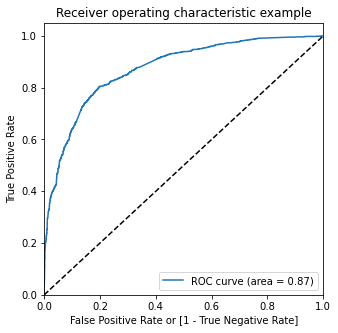

In [301]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

### Test Set model evaluation

In [302]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
log_reg_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")


************************************************** 

Confusion Matrix
[[1353  324]
 [ 221  874]] 

************************************************** 

True Negative                    :  1353
True Positive                    :  874
False Negative                   :  221
False Positve                    :  324
Model Accuracy                   :  0.8034
Model Sensitivity                :  0.7982
Model Specificity                :  0.8068
Model Precision                  :  0.7295
Model Recall                     :  0.7982
Model True Positive Rate (TPR)   :  0.7982
Model False Positive Rate (FPR)  :  0.1932


************************************************** 



In [303]:
# features and their coefficicent from final model
parameters=logm4.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website             5.388662
Lead Source_Reference                    2.925326
current_job_Working Professional         2.669665
Last Activity_SMS Sent                   2.051879
Last Activity_Others                     1.253061
Total Time Spent on Website              1.049789
Last Activity_Email Opened               0.942099
Lead Source_Olark Chat                   0.907184
Last Activity_Olark Chat Conversation   -0.555605
const                                   -1.023594
Specialization_Hospitality Management   -1.094445
Specialization_Others                   -1.203333
Lead Origin_Landing Page Submission     -1.258954
dtype: float64

In [304]:
# Lets add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.697934,1,70
1,2376,1,0.860665,1,86
2,7766,1,0.889241,1,89
3,9199,0,0.057065,0,6
4,4359,1,0.871510,1,87


## Conclusion

Train Data Set:
Accuracy: 80.46%

Sensitivity: 80.05%

Specificity: 80.71%

Test Data Set:
Accuracy: 80.34%

Sensitivity: 79.82% ≈ 80%

Specificity: 80.68%